## <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Data Cleaning & EDA

## Import Libraries

In [1]:
# Basic imports
import pandas as pd
import numpy as np


# Time
import time
from datetime import datetime

# Visualisation 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Processing 
import re
import string
import nltk


# Vectorizing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling - Basics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelling - Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Modelling - Logistic Regression
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline

# Modelling - Classification metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_roc_curve, roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.width', None)

#### Load Data

In [2]:
df_aa = pd.read_csv('data/alcoholicsanonymous_raw.csv')
df_ss = pd.read_csv('data/stopsmoking_raw.csv')

In [3]:
df_aa.head()

Unnamed: 0 all_awardings  allow_live_comments                author  \
0           0            []                False            dvlgxng616   
1           1            []                False  Emergency_Garden_149   
2           2            []                False     Yoself_reflection   
3           3            []                False             Essby1111   
4           4            []                False               Okie69R   

   author_flair_css_class author_flair_richtext  author_flair_text  \
0                     NaN                    []                NaN   
1                     NaN                    []                NaN   
2                     NaN                    []                NaN   
3                     NaN                    []                NaN   
4                     NaN                    []                NaN   

  author_flair_type author_fullname  author_is_blocked author_patreon_flair  \
0              text     t2_6ls6k8yz              False                False   
1              text     t2_c19s1t82              False                False   
2              text     t2_eczow0re              False                False   
3              text     t2_bnv10h6a              False                False   
4              text     t2_5ltehq4u              False                False   

  author_premium awarders  can_mod_post  contest_mode  created_utc  \
0          False       []         False         False   1635379875   
1          False       []         False         False   1635377244   
2          False       []         False         False   1635375880   
3          False       []         False         False   1635372215   
4          False       []         False         False   1635364904   

                     domain  \
0  self.alcoholicsanonymous   
1  self.alcoholicsanonymous   
2  self.alcoholicsanonymous   
3  self.alcoholicsanonymous   
4                self.NoFap   

                                           full_link gildings      id  \
0  https://www.reddit.com/r/alcoholicsanonymous/c...       {}  qhaax2   
1  https://www.reddit.com/r/alcoholicsanonymous/c...       {}  qh9gx7   
2  https://www.reddit.com/r/alcoholicsanonymous/c...       {}  qh91hm   
3  https://www.reddit.com/r/alcoholicsanonymous/c...       {}  qh7teu   
4  https://www.reddit.com/r/alcoholicsanonymous/c...       {}  qh581s   

   is_created_from_ads_ui  is_crosspostable  is_meta  is_original_content  \
0                   False              True    False                False   
1                   False             False    False                False   
2                   False              True    False                False   
3                   False              True    False                False   
4                   False              True    False                False   

   is_reddit_media_domain  is_robot_indexable  is_self  is_video  \
0                   False                True     True     False   
1                   False               False     True     False   
2                   False                True     True     False   
3                   False                True     True     False   
4                   False                True    False     False   

   link_flair_background_color link_flair_richtext link_flair_text_color  \
0                          NaN                  []                  dark   
1                          NaN                  []                  dark   
2                          NaN                  []                  dark   
3                          NaN                  []                  dark   
4                          NaN                  []                  dark   

  link_flair_type  locked  media_only  no_follow  num_comments  \
0            text   False       False       True             0   
1            text   False       False       True             0   
2            text   False       False       True             0   
3            text   Fa

In [4]:
df_ss.head()

Unnamed: 0 all_awardings  allow_live_comments                author  \
0           0            []                False  theshortestguyouknow   
1           1            []                False       itybityme135711   
2           2            []                False         AdvancedBas1c   
3           3            []                False         AdvancedBas1c   
4           4            []                False              SirZeets   

  author_flair_css_class author_flair_richtext author_flair_text  \
0                    NaN                    []               NaN   
1                    NaN                    []               NaN   
2                    NaN                    []               NaN   
3                    NaN                    []               NaN   
4                    NaN                    []               NaN   

  author_flair_type author_fullname  author_is_blocked author_patreon_flair  \
0              text     t2_2raol0r2              False                False   
1              text     t2_c57fbps8              False                False   
2              text     t2_2p6ql7bj              False                False   
3              text     t2_2p6ql7bj              False                False   
4              text      t2_8w7vl6p              False                False   

  author_premium awarders  can_mod_post  contest_mode  created_utc  \
0          False       []         False         False   1635383550   
1          False       []         False         False   1635382012   
2          False       []         False         False   1635381737   
3          False       []         False         False   1635381617   
4          False       []         False         False   1635379883   

             domain                                          full_link  \
0  self.stopsmoking  https://www.reddit.com/r/stopsmoking/comments/...   
1  self.stopsmoking  https://www.reddit.com/r/stopsmoking/comments/...   
2  self.stopsmoking  https://www.reddit.com/r/stopsmoking/comments/...   
3  self.stopsmoking  https://www.reddit.com/r/stopsmoking/comments/...   
4   self.Cigarettes  https://www.reddit.com/r/stopsmoking/comments/...   

  gildings      id  is_created_from_ads_ui  is_crosspostable  is_meta  \
0       {}  qhbf9z                   False              True    False   
1       {}  qhayge                   False              True    False   
2       {}  qhavhz                   False              True    False   
3       {}  qhau5u                   False              True    False   
4       {}  qhab0n                   False              True    False   

   is_original_content  is_reddit_media_domain  is_robot_indexable  is_self  \
0                False                   False                True     True   
1                False                   False                True     True   
2                False                   False                True     True   
3                False                   False                True     True   
4                False                   False                True    False   

   is_video  link_flair_background_color link_flair_richtext  \
0     False                          NaN                  []   
1     False                          NaN                  []   
2     False                          NaN                  []   
3     False                          NaN                  []   
4     False                          NaN                  []   

  link_flair_text_color link_flair_type  locked  media_only  no_follow  \
0                  dark            text   False       False       True   
1                  dark            text   False       False       True   
2                  dark            text   False       False       True   
3                  dark            text   False       False       True   
4                  dark            text   False       False       True   

   num_comments  num_crossposts  over_18 parent_whitelist_status

In [5]:
df_aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2000 non-null   int64  
 1   all_awardings                  2000 non-null   object 
 2   allow_live_comments            2000 non-null   bool   
 3   author                         2000 non-null   object 
 4   author_flair_css_class         0 non-null      float64
 5   author_flair_richtext          1991 non-null   object 
 6   author_flair_text              0 non-null      float64
 7   author_flair_type              1991 non-null   object 
 8   author_fullname                1991 non-null   object 
 9   author_is_blocked              2000 non-null   bool   
 10  author_patreon_flair           1991 non-null   object 
 11  author_premium                 1991 non-null   object 
 12  awarders                       2000 non-null   o

In [6]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2000 non-null   int64  
 1   all_awardings                  2000 non-null   object 
 2   allow_live_comments            2000 non-null   bool   
 3   author                         2000 non-null   object 
 4   author_flair_css_class         197 non-null    object 
 5   author_flair_richtext          1993 non-null   object 
 6   author_flair_text              197 non-null    object 
 7   author_flair_type              1993 non-null   object 
 8   author_fullname                1993 non-null   object 
 9   author_is_blocked              2000 non-null   bool   
 10  author_patreon_flair           1993 non-null   object 
 11  author_premium                 1993 non-null   object 
 12  awarders                       2000 non-null   o

In [7]:
df_aa.shape, df_ss.shape

((2000, 71), (2000, 82))

In [8]:
# keeping only columns 'created_utc', 'author', 'subreddit', 'title' and 'selftext'

df1 = df_aa[['created_utc', 'author', 'subreddit', 'title', 'selftext']]
print(df1.info(), '\n')

print('-'* 40, '\n')
df2 = df_ss[['created_utc', 'author', 'subreddit', 'title', 'selftext']]
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_utc  2000 non-null   int64 
 1   author       2000 non-null   object
 2   subreddit    2000 non-null   object
 3   title        2000 non-null   object
 4   selftext     1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB
None 

---------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_utc  2000 non-null   int64 
 1   author       2000 non-null   object
 2   subreddit    2000 non-null   object
 3   title        2000 non-null   object
 4   selftext     1491 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB
None


### Discover Data

#### Authors

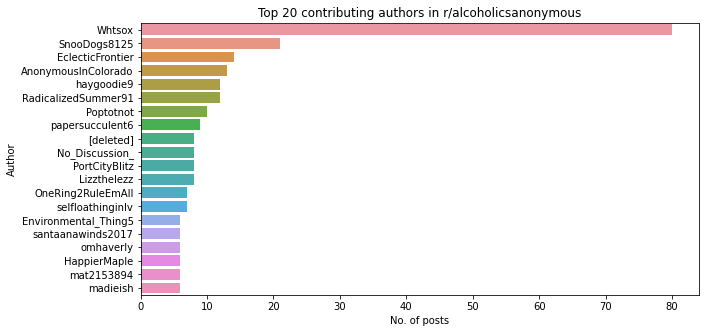

In [9]:
# Look at the top authors in alcoholicsanonymous

authors = df1.groupby('author')['selftext'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,5))
p = sns.barplot(x=authors.values, y=authors.index)
p.set_xlabel('No. of posts')
p.set_ylabel('Author')
p.set_title('Top 20 contributing authors in r/alcoholicsanonymous');

In [10]:
authors.head()

author
Whtsox                 80
SnooDogs8125           21
EclecticFrontier       14
AnonymousInColorado    13
haygoodie9             12
Name: selftext, dtype: int64

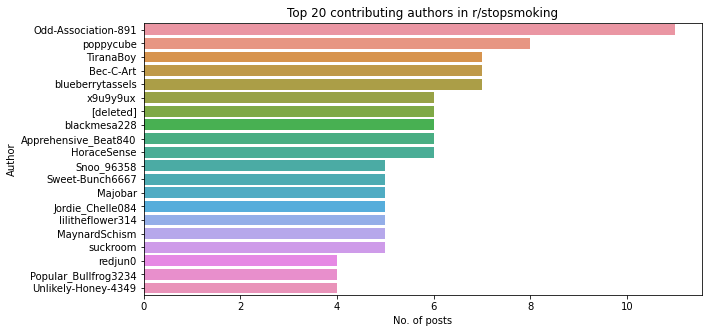

In [11]:
# Look at the top authors in r/stopsmoking

authors = df2.groupby('author')['selftext'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,5))
p = sns.barplot(x=authors.values, y=authors.index)
p.set_xlabel('No. of posts')
p.set_ylabel('Author')
p.set_title('Top 20 contributing authors in r/stopsmoking');

In [12]:
authors.head()

author
Odd-Association-891    11
poppycube               8
TiranaBoy               7
Bec-C-Art               7
blueberrytassels        7
Name: selftext, dtype: int64

**Observations:**
* Top contibuting author in r/alcoholicsanonymous is Whtsox with 80 posts which is significantly higher than next author with 21 posts. This will be looked into further below.
* Top contibuting author in r/stopsmoking is Odd-Association-891 with 11 posts
* In r/alcoholicsanonymous, there seems to be posts where author has been deleted, will look into it further

In [13]:
df1.loc[df1['author'] == 'Whtsox']

created_utc  author            subreddit                       title  \
14     1635341836  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 27   
41     1635226587  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 26   
65     1635167168  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 25   
90     1635078982  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 24   
114    1634986502  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 23   
133    1634909787  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 22   
151    1634823416  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 21   
161    1634794798  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 20   
204    1634652187  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 19   
233    1634563988  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 18   
262    1634478456  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 17   
284    1634388352  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 16   
314    1634306183  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 15   
328    1634244516  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 14   
360    1634132248  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 13   
383    1634048500  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 12   
409    1633960960  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 11   
442    1633868877  Whtsox  alcoholicsanonymous  Daily Reflections : Oct 10   
468    1633765115  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 9   
481    1633702179  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 8   
502    1633622256  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 7   
534    1633527090  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 6   
564    1633443022  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 5   
596    1633349795  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 4   
623    1633241940  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 3   
628    1633235194  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 2   
658    1633179314  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 2   
678    1633091848  Whtsox  alcoholicsanonymous   Daily Reflections : Oct 1   
703    1633006891  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 30   
729    1632924276  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 29   
764    1632807709  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 28   
795    1632722775  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 27   
815    1632668853  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 26   
835    1632578492  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 25   
857    1632492383  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 24   
874    1632406705  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 23   
905    1632320822  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 22   
907    1632317041  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 21   
940    1632227500  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 21   
968    1632118193  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 20   
997    1632059437  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 19   
1028   1631964165  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 18   
1072   1631802142  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 16   
1097   1631695524  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 15   
1116   1631630821  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 14   
1143   1631542987  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 13   
1170   1631462711  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 12   
1197   1631350326  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 11   
1219   1631277478  Whtsox  alcoholicsanonymous  Daily Reflections : Sep 10   
1260   1631176443  Whtsox  alcoholicsanonymous   Daily Reflections : Sep 9   
1275   1631107146  Whtsox  a

From looking at 'Whtsox' post, we can see that he has been posting daily reflections, which explains his signficant contribution of posts to r/alcoholicsanonymous. Even with his contribution with 81 posts, this is still =<4% of the dataset, hence his posts will be kept.

In [14]:
# Look into post with deleted authors
df1.loc[df1['author'] == '[deleted]']

created_utc     author            subreddit  \
109    1635007019  [deleted]  alcoholicsanonymous   
546    1633486532  [deleted]  alcoholicsanonymous   
886    1632368215  [deleted]  alcoholicsanonymous   
1328   1630924506  [deleted]  alcoholicsanonymous   
1702   1629540257  [deleted]  alcoholicsanonymous   
1704   1629527534  [deleted]  alcoholicsanonymous   
1716   1629495379  [deleted]  alcoholicsanonymous   
1725   1629467206  [deleted]  alcoholicsanonymous   
1894   1628868620  [deleted]  alcoholicsanonymous   

                                                  title   selftext  
109                          alcohol and social anxiety  [deleted]  
546                                          I'm buzzed        NaN  
886       Struggling out of detox with myself...anyone?  [deleted]  
1328                            Relating to my sponsor.  [deleted]  
1702           PLEASE TELL ME YOU ARE AWAKE I NEED HELP  [deleted]  
1704  I think it’s difficult when you get sober and ...  [deleted]  
1716                         Drinking while on suboxone  [deleted]  
1725                       Being alcoholic destroyed me  [deleted]  
1894                         Daily Reflections : Aug 13  [deleted]

Posts with deleted authors look to have meaningful title despite not having selftext. These posts will be kept.

#### Date and Time of posts

In [15]:
# Check date and time for df1
print('r/alcoholicsanonymous date & time range')
pd.to_datetime(df1['created_utc'], unit='s').describe()

r/alcoholicsanonymous date & time range


count                    2000
unique                   1999
top       2021-08-28 22:50:35
freq                        2
first     2021-08-09 12:26:43
last      2021-10-28 00:11:15
Name: created_utc, dtype: object

In [16]:
# Check date and time for df2
print('r/stopsmoking date & time range')
pd.to_datetime(df2['created_utc'], unit='s').describe()

r/stopsmoking date & time range


count                    2000
unique                   2000
top       2021-09-17 00:19:45
freq                        1
first     2021-08-29 14:46:28
last      2021-10-28 01:12:30
Name: created_utc, dtype: object

**Observations:**
* Date range for r/alcoholicsanonymous is from 9 August to 28 October 2021
* Date range for r/stopsmoking is from 29 August to 28 October 2021
* From the information above, we can conclude that r/stopsmoking is more active than r/alcoholicsanonymous as the date range of r/stopsmoking is narrower while scraping for the same number of posts


## Data Cleaning

### Dealing with null values

Both datasets will be checked for null values, a check for '[removed]' under the 'selftext' will be done as well.

In [17]:
# Checking for null values in both df

print('null values for df1', str(df1.isnull().sum()), '\n',)
print( '-'*40, '\n')
print('null values for df2', str(df2.isnull().sum()))

null values for df1 created_utc      0
author           0
subreddit        0
title            0
selftext       106
dtype: int64 

---------------------------------------- 

null values for df2 created_utc      0
author           0
subreddit        0
title            0
selftext       509
dtype: int64


In [18]:
# Look at posts that have null selftext
df1[df1['selftext'].isnull()].head()

created_utc                author            subreddit  \
2    1635375880     Yoself_reflection  alcoholicsanonymous   
4    1635364904               Okie69R  alcoholicsanonymous   
16   1635337960  AntiqueCauliflower84  alcoholicsanonymous   
17   1635336539             gu007_227  alcoholicsanonymous   
79   1635111948        orangebluelife  alcoholicsanonymous   

                                                title selftext  
2   How has your relationship with alcohol impacte...      NaN  
4   What are 3 things that give you dopamine, othe...      NaN  
16  Desperately Need Help with Alcoholic/Dementia ...      NaN  
17                                              Day 1      NaN  
79  I hate not having whole recollection of a big ...      NaN

In [19]:
df2[df2['selftext'].isnull()].head()

created_utc                author    subreddit  \
4    1635379883              SirZeets  stopsmoking   
11   1635365471                 jxnek  stopsmoking   
14   1635359449   minimalisticlife007  stopsmoking   
15   1635353597      dogsareadoerable  stopsmoking   
17   1635347997  Kindly-Lifeguard-521  stopsmoking   

                                                title selftext  
4   I started smoking again and not sure if I want...      NaN  
11                          I missed the 6 month mark      NaN  
14  After going cold turkey for more than 7 days, ...      NaN  
15                      One week is a big achievement      NaN  
17  8 Days guys ! rn I'm going to buy some ice cre...      NaN

In [20]:
# Check for number of rows with [removed]
print('rows with [removed] for df1:', '\n')
print((df1[df1['selftext'] == '[removed]'].count()), '\n')
print('rows with [removed] for df2:', '\n')
print(df2[df2['selftext'] == '[removed]'].count())

rows with [removed] for df1: 

created_utc    50
author         50
subreddit      50
title          50
selftext       50
dtype: int64 

rows with [removed] for df2: 

created_utc    23
author         23
subreddit      23
title          23
selftext       23
dtype: int64


In [21]:
# Look at posts that have [removed] as selftext
df1[df1['selftext'] == '[removed]'].head()

created_utc                author            subreddit  \
1    1635377244  Emergency_Garden_149  alcoholicsanonymous   
6    1635361936            DonSalapat  alcoholicsanonymous   
8    1635357108      Crazy_Crayfish_1  alcoholicsanonymous   
28   1635284025           meepmeep534  alcoholicsanonymous   
34   1635268214  ThrowawaySeagullCurl  alcoholicsanonymous   

                                             title   selftext  
1                 19 year old do I have a problem?  [removed]  
6                Advice on my alcohol consumption!  [removed]  
8                      How do you deal with guilt?  [removed]  
28                                      Struggling  [removed]  
34  14/15 years old and had a binge drinking issue  [removed]

In [22]:
df2[df2['selftext'] == '[removed]'].head()

created_utc                author    subreddit  \
16    1635350454              suckroom  stopsmoking   
26    1635330932       AdvancedOwl7715  stopsmoking   
31    1635322243        TheEpicTeamTET  stopsmoking   
67    1635235132             kiffstory  stopsmoking   
206   1634841615  Itchy-Expression4882  stopsmoking   

                                                 title   selftext  
16   I've put away all of my stash after a biggest ...  [removed]  
26                                 Tormenting cravings  [removed]  
31   Join Our WhatsApp Group, To Make Friends, Comb...  [removed]  
67        Quit smoking naturally (live on Kickstarter)  [removed]  
206                                              Day 1  [removed]

Null values are found in both datasets under the column 'selftext', these rows will be kept as information from 'title' may still be valuable. They will be replace with 'no_text' instead.

Cells with [removed] have the same effect as those with null value and will be replaced with 'no_text' as well.

In [23]:
# Fill in null values with 'no_text'
df1['selftext'].fillna('no_text', inplace=True)
df2['selftext'].fillna('no_text', inplace=True)

# Replacing [removed] with 'no_text'
df1['selftext'] = df1['selftext'].replace('[removed]', 'no_text')
df2['selftext'] = df2['selftext'].replace('[removed]', 'no_text')

In [24]:
# Check if all null values and [removed] have been changed to 'no_text'

print('Rows with "no_text" for df1:', df1['selftext'][df1['selftext'] == 'no_text'].count(), '\n')
print('Rows with "no_text" for df2:', df2['selftext'][df2['selftext'] == 'no_text'].count(), '\n')

# Final check for null values
print('Null values in df1:', df1['selftext'].isnull().sum(), '\n')
print('Null values in df2:', df2['selftext'].isnull().sum(), '\n')

Rows with "no_text" for df1: 156 

Rows with "no_text" for df2: 532 

Null values in df1: 0 

Null values in df2: 0 



All null values and [removed] have been successfully replace with 'no_text'.

### Dealing with duplicates

Duplicates will be removed as they would not provide any additional information.

In [25]:
# created_utc will be dropped as we want to see if there's duplicated posts that may have been posted at diff times
df1.drop(columns='created_utc', inplace=True) 
df2.drop(columns='created_utc', inplace=True)

In [26]:
# Duplicates in both df
print(f"There are {df1.duplicated().sum()} duplicated posts in df1")
print(f"There are {df2.duplicated().sum()} duplicated posts in df2")

There are 4 duplicated posts in df1
There are 5 duplicated posts in df2


In [27]:
# Check the duplicates
df1[df1.duplicated()]

author            subreddit  \
393   Aromatic_Tonight_868  alcoholicsanonymous   
1356  CryptographerFull933  alcoholicsanonymous   
1537         bobby2bundles  alcoholicsanonymous   
1816     freedemocracy2021  alcoholicsanonymous   

                                             title  \
393                        sponsie keeps relapsing   
1356                                 13 days sober   
1537                   Running away the easy way !   
1816  Psychedelics Influenced Alcoholics Anonymous   

                                               selftext  
393                                             no_text  
1356                                            no_text  
1537  \nIn the face of your own conflicts, so not tr...  
1816                                            no_text

In [28]:
df2[df2.duplicated()]

author    subreddit  \
1323  userthrowaway121012  stopsmoking   
1443         brightback73  stopsmoking   
1477        unknown_54678  stopsmoking   
1479        unknown_54678  stopsmoking   
1601             Alan_007  stopsmoking   

                                                  title selftext  
1323                               10 Weeks smoke free!  no_text  
1443  Kabhi Kabhi Toh Lage Har Din Mushkil Aur Har P...  no_text  
1477                           Teenager trying to quit.  no_text  
1479                           Teenager trying to quit.  no_text  
1601  This is like my Nth attempt, hope this is the ...  no_text

In [29]:
# Drop duplicated records
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

# Check if there are any duplicates 
print(f"There are {df1.duplicated().sum()} duplicated post(s) in df1")
print(f"There are {df2.duplicated().sum()} duplicated post(s) in df2")

There are 0 duplicated post(s) in df1
There are 0 duplicated post(s) in df2


In [30]:
df1.head()

author            subreddit  \
0            dvlgxng616  alcoholicsanonymous   
1  Emergency_Garden_149  alcoholicsanonymous   
2     Yoself_reflection  alcoholicsanonymous   
3             Essby1111  alcoholicsanonymous   
4               Okie69R  alcoholicsanonymous   

                                               title  \
0  Does anyone look back at messages and post's y...   
1                   19 year old do I have a problem?   
2  How has your relationship with alcohol impacte...   
3                     Rehab and working from home???   
4  What are 3 things that give you dopamine, othe...   

                                            selftext  
0  Been going pretty hard with drugs for a while ...  
1                                            no_text  
2                                            no_text  
3  So, does anyone know if you can go to rehab an...  
4                                            no_text

In [31]:
df2.head()

author    subreddit  \
0  theshortestguyouknow  stopsmoking   
1       itybityme135711  stopsmoking   
2         AdvancedBas1c  stopsmoking   
3         AdvancedBas1c  stopsmoking   
4              SirZeets  stopsmoking   

                                               title  \
0                  3 Month’s After Quitting Nicotine   
1                    I want to stop smoking entirely   
2                           TWO Months of disbelief!   
3                           TWO MONTHS of disbelief!   
4  I started smoking again and not sure if I want...   

                                            selftext  
0  I’ve reached my 3 month mark from quitting ON ...  
1  I’m a closet social smoker. So only a handful ...  
2  If you knew me the phrase “If I can do it, you...  
3   If you knew me the phrase “If I can do it, yo...  
4                                            no_text

## Merging Datasets

Both clean datasets will be merged with indexes reset. Since both dataframes have the same columns, using Pandas concatenate will suffice.

Column 'author' will be dropped as we will only be analysing the title and selftext moving forward.

Subreddit columns will be converted to 1/0 where {'alcoholicsanonymous': 1, 'stopsmoking': 0}.

In [32]:
df = pd.concat([df1, df2], ignore_index=True)
df.drop(columns=['author'], inplace=True)
df['subreddit'] = df['subreddit'].map({'alcoholicsanonymous': 1, 'stopsmoking': 0})
df.head()

subreddit                                              title  \
0          1  Does anyone look back at messages and post's y...   
1          1                   19 year old do I have a problem?   
2          1  How has your relationship with alcohol impacte...   
3          1                     Rehab and working from home???   
4          1  What are 3 things that give you dopamine, othe...   

                                            selftext  
0  Been going pretty hard with drugs for a while ...  
1                                            no_text  
2                                            no_text  
3  So, does anyone know if you can go to rehab an...  
4                                            no_text

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3991 non-null   int64 
 1   title      3991 non-null   object
 2   selftext   3991 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.7+ KB


### Regex

Use regex to drop text that will not be used in title and subreddit columns.

In [34]:
# Remove any URLs in selftext and title
df["selftext"] = df["selftext"].str.replace("http\S+|www.\S+", "", case=False, regex = True)

df["title"] = df["title"].str.replace("http\S+|www.\S+", "", case=False, regex = True)

In [35]:
# Remove any non-english symbols
df["selftext"] = df["selftext"].str.replace("[^a-zA-Z1-9]+", " ", case=False, regex=True)
df["title"] = df["title"].str.replace("[^a-zA-Z1-9]+", " ", case=False, regex=True)

In [36]:
# Create function to remove links, special terms and digits
def regex_clean(row):
            
    # Remove special terms    
    row['selftext'] = re.sub(
        pattern='#x200B;|&lt;|&gt;|&amp;|_',
        repl='',
        string=row['selftext'])
    row['title'] = re.sub(
        pattern='#x200B;|&lt;|&gt;|&amp;|_',
        repl='',
        string=row['title'])
  
    
    # Remove all digits
    row['selftext'] = re.sub(
        pattern=r'\d+',
        repl='',
        string=row['selftext'])
    row['title'] = re.sub(
        pattern=r'\d+',
        repl='',
        string=row['title'])

    return row
    
df.apply(regex_clean, axis=1)

subreddit                                              title  \
0             1  Does anyone look back at messages and post s y...   
1             1                      year old do I have a problem    
2             1  How has your relationship with alcohol impacte...   
3             1                       Rehab and working from home    
4             1  What are  things that give you dopamine other ...   
5             1  What would you have wanted your sibling to say...   
6             1                  Advice on my alcohol consumption    
7             1  What sort of liability insurance do y all have...   
8             1                        How do you deal with guilt    
9             1                       Does it actually get better    
10            1                                Day two of sobriety   
11            1                                          First day   
12            1                      The Real Causes of Depression   
13            1                                        Rock bottom   
14            1                             Daily Reflections Oct    
15            1                         Newbie here with questions   
16            1  Desperately Need Help with Alcoholic Dementia ...   
17            1                                               Day    
18            1                                           sobriety   
19            1  What Is Step  And How Can I Apply It In This S...   
20            1                               Relapsed after  days   
21            1                    Not sure if I m ready for this    
22            1  Brother is scaring his  and  year old daughter...   
23            1                   Just dropped out of college at     
24            1                                      week check in   
25            1                              Need help who to ask    
26            1                         Years Sober and I Relapsed   
27            1                           When does it get better    
28            1                                         Struggling   
29            1                                    Wife s Drinking   
30            1                  Higher power has a sense of humor   
31            1                      Help formatting step  please    
32            1                 Help with step  Formatting Please    
33            1  Today I celebrate  years clean and sober a mir...   
34            1           years old and had a binge drinking issue   
35            1                                              Day     
36            1                                               Day    
37            1                               This feels like hell   
38            1                     Relationship with an alcoholic   
39            1                                            Curious   
40            1                                            th Step   
41            1                             Daily Reflections Oct    
42            1                         Antidepressants Long Term    
43            1           Drinking too much instead of too little    
44            1                                               Welp   
45            1                         Throwaway account kind of    
46            1      Sobriety Delivers Everything Alcohol Promised   
47            1  How to talk about my religious beliefs without...   
48            1          Looking for help with withdrawal symptoms   
49            1                               ALCOHOLICS ANONYMOUS   
50            1                      Am I experiencing withdrawal    
51            1                                        Help please   
52            1                                   alcohoicsanymous   
53            1                     Feeling victorious  days sober   
54            1                     Spiritual experience gone bad    
55            1             What do I do with myself outside of AA   
56            1 

In [37]:
# Create a new column for combined title and selftext, as we would want all analyse all text (title + selftext).
df['combined_text'] = df['title'] + df['selftext']
df.head(10)

subreddit                                              title  \
0          1  Does anyone look back at messages and post s y...   
1          1                   19 year old do I have a problem    
2          1  How has your relationship with alcohol impacte...   
3          1                       Rehab and working from home    
4          1  What are 3 things that give you dopamine other...   
5          1  What would you have wanted your sibling to say...   
6          1                  Advice on my alcohol consumption    
7          1  What sort of liability insurance do y all have...   
8          1                        How do you deal with guilt    
9          1                       Does it actually get better    

                                            selftext  \
0  Been going pretty hard with drugs for a while ...   
1                                            no text   
2                                            no text   
3  So does anyone know if you can go to rehab and...   
4                                            no text   
5  I didn t know how to phrase the question so I ...   
6                                            no text   
7  I m not trying to sell y all insurance Rather ...   
8                                            no text   
9  Im 29m and coming up on 11 months sober now an...   

                                       combined_text  
0  Does anyone look back at messages and post s y...  
1            19 year old do I have a problem no text  
2  How has your relationship with alcohol impacte...  
3  Rehab and working from home So does anyone kno...  
4  What are 3 things that give you dopamine other...  
5  What would you have wanted your sibling to say...  
6           Advice on my alcohol consumption no text  
7  What sort of liability insurance do y all have...  
8                 How do you deal with guilt no text  
9  Does it actually get better Im 29m and coming ...

In [38]:
# save clean df to csv
df.to_csv('data/combined_df.csv', index=False)

## Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---| 
|subreddit|object|combined_df|Subreddist of post|
|title|object|combined_df|Title of the subreddit post|
|selftext|object|combined_df|Body text of subreddit post|
|combined_text|object|combined_df|Concatenation of title and body text of subreddit post|



## Pre-processing text data
1. Removing punctuations
2. Tokenization
3. Remove stopwords
4. Stemming
5. Lemmatizing

### Stemming vs Lemmatizing

We will compare between stemming and lemmatizing words to see which produces a more desirable output.

In [39]:
# Preparing text for stemming and lemmatizing by removing punctuations, removing non-words and tokenizing words
def test(text):
    
    # store character only if it's not a punctuation
    text_clean = "".join([char for char in text if char not in string.punctuation])
    
    # \W matches any non-word character
    # Add a + in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text_clean)
    
    return tokens
    
df['combined_text_tokenized'] = df['combined_text'].apply(lambda x: test(x))
df.head()

subreddit                                              title  \
0          1  Does anyone look back at messages and post s y...   
1          1                   19 year old do I have a problem    
2          1  How has your relationship with alcohol impacte...   
3          1                       Rehab and working from home    
4          1  What are 3 things that give you dopamine other...   

                                            selftext  \
0  Been going pretty hard with drugs for a while ...   
1                                            no text   
2                                            no text   
3  So does anyone know if you can go to rehab and...   
4                                            no text   

                                       combined_text  \
0  Does anyone look back at messages and post s y...   
1            19 year old do I have a problem no text   
2  How has your relationship with alcohol impacte...   
3  Rehab and working from home So does anyone kno...   
4  What are 3 things that give you dopamine other...   

                             combined_text_tokenized  
0  [Does, anyone, look, back, at, messages, and, ...  
1  [19, year, old, do, I, have, a, problem, no, t...  
2  [How, has, your, relationship, with, alcohol, ...  
3  [Rehab, and, working, from, home, So, does, an...  
4  [What, are, 3, things, that, give, you, dopami...

In [40]:
# Stemming of words with Porter stemmer

import nltk
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['combined_text_stemmed'] = df['combined_text_tokenized'].apply(lambda x: stemming(x))

df.head()

subreddit                                              title  \
0          1  Does anyone look back at messages and post s y...   
1          1                   19 year old do I have a problem    
2          1  How has your relationship with alcohol impacte...   
3          1                       Rehab and working from home    
4          1  What are 3 things that give you dopamine other...   

                                            selftext  \
0  Been going pretty hard with drugs for a while ...   
1                                            no text   
2                                            no text   
3  So does anyone know if you can go to rehab and...   
4                                            no text   

                                       combined_text  \
0  Does anyone look back at messages and post s y...   
1            19 year old do I have a problem no text   
2  How has your relationship with alcohol impacte...   
3  Rehab and working from home So does anyone kno...   
4  What are 3 things that give you dopamine other...   

                             combined_text_tokenized  \
0  [Does, anyone, look, back, at, messages, and, ...   
1  [19, year, old, do, I, have, a, problem, no, t...   
2  [How, has, your, relationship, with, alcohol, ...   
3  [Rehab, and, working, from, home, So, does, an...   
4  [What, are, 3, things, that, give, you, dopami...   

                               combined_text_stemmed  
0  [doe, anyon, look, back, at, messag, and, post...  
1  [19, year, old, do, i, have, a, problem, no, t...  
2  [how, ha, your, relationship, with, alcohol, i...  
3  [rehab, and, work, from, home, so, doe, anyon,...  
4  [what, are, 3, thing, that, give, you, dopamin...

In [41]:
# Lemmatizing words with WordNet lemmatizer

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words 
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['combined_text_lemmatized'] = df['combined_text_tokenized'].apply(lambda x: lemmatizing(x))

df.head()

subreddit                                              title  \
0          1  Does anyone look back at messages and post s y...   
1          1                   19 year old do I have a problem    
2          1  How has your relationship with alcohol impacte...   
3          1                       Rehab and working from home    
4          1  What are 3 things that give you dopamine other...   

                                            selftext  \
0  Been going pretty hard with drugs for a while ...   
1                                            no text   
2                                            no text   
3  So does anyone know if you can go to rehab and...   
4                                            no text   

                                       combined_text  \
0  Does anyone look back at messages and post s y...   
1            19 year old do I have a problem no text   
2  How has your relationship with alcohol impacte...   
3  Rehab and working from home So does anyone kno...   
4  What are 3 things that give you dopamine other...   

                             combined_text_tokenized  \
0  [Does, anyone, look, back, at, messages, and, ...   
1  [19, year, old, do, I, have, a, problem, no, t...   
2  [How, has, your, relationship, with, alcohol, ...   
3  [Rehab, and, working, from, home, So, does, an...   
4  [What, are, 3, things, that, give, you, dopami...   

                               combined_text_stemmed  \
0  [doe, anyon, look, back, at, messag, and, post...   
1  [19, year, old, do, i, have, a, problem, no, t...   
2  [how, ha, your, relationship, with, alcohol, i...   
3  [rehab, and, work, from, home, so, doe, anyon,...   
4  [what, are, 3, thing, that, give, you, dopamin...   

                            combined_text_lemmatized  
0  [Does, anyone, look, back, at, message, and, p...  
1  [19, year, old, do, I, have, a, problem, no, t...  
2  [How, ha, your, relationship, with, alcohol, i...  
3  [Rehab, and, working, from, home, So, doe, any...  
4  [What, are, 3, thing, that, give, you, dopamin...

In [42]:
df[['combined_text_stemmed', 'combined_text_lemmatized']]

combined_text_stemmed  \
0     [doe, anyon, look, back, at, messag, and, post...   
1     [19, year, old, do, i, have, a, problem, no, t...   
2     [how, ha, your, relationship, with, alcohol, i...   
3     [rehab, and, work, from, home, so, doe, anyon,...   
4     [what, are, 3, thing, that, give, you, dopamin...   
5     [what, would, you, have, want, your, sibl, to,...   
6          [advic, on, my, alcohol, consumpt, no, text]   
7     [what, sort, of, liabil, insur, do, y, all, ha...   
8           [how, do, you, deal, with, guilt, no, text]   
9     [doe, it, actual, get, better, im, 29m, and, c...   
10    [day, two, of, sobrietyi, wa, sober, for, 3, y...   
11    [first, dayhey, everyon, i, m, about, alcohol,...   
12    [the, real, caus, of, depressioni, do, not, ow...   
13    [rock, bottomso, about, a, week, ago, i, fuck,...   
14    [daili, reflect, oct, 27global, share, the, on...   
15    [newbi, here, with, questionsgood, morn, i, am...   
16    [desper, need, help, with, alcohol, dementia, ...   
17                                     [day, 1no, text]   
18                                           [sobrieti]   
19    [what, is, step, 1, and, how, can, i, appli, i...   
20    [relaps, after, 2, daysi, wish, i, could, have...   
21    [not, sure, if, i, m, readi, for, thi, i, ve, ...   
22    [brother, is, scare, hi, 19, and, 21, year, ol...   
23    [just, drop, out, of, colleg, at, 2, welp, tim...   
24    [6, week, check, inalcohol, free, feel, good, ...   
25    [need, help, who, to, ask, ive, tri, on, my, o...   
26    [6, year, sober, and, i, relapsedwel, i, wa, s...   
27    [when, doe, it, get, better, yesterday, i, wa,...   
28                                 [strugglingno, text]   
29    [wife, s, drinkingnot, sure, who, els, to, tal...   
30    [higher, power, ha, a, sens, of, humoron, sund...   
31    [help, format, step, 6, pleas, hi, fellow, fel...   
32    [help, with, step, 7, format, pleas, hi, there...   
33    [today, i, celebr, 38, year, clean, and, sober...   
34    [14, 15, year, old, and, had, a, bing, drink, ...   
35    [day, 3, i, honestli, don, t, have, much, to, ...   
36    [day, 3i, relaps, last, weekend, after, about,...   
37                      [thi, feel, like, hellno, text]   
38    [relationship, with, an, alcoholicso, be, toge...   
39                                    [curiousno, text]   
40    [5th, stepi, just, start, my, 5th, step, with,...   
41    [daili, reflect, oct, 26one, ultim, author, fo...   
42    [antidepress, long, term, i, know, what, the, ...   
43    [drink, too, much, instead, of, too, littl, no...   
44    [welpi, m, 2, year, old, and, my, hand, havnt,...   
45             [throwaway, account, kind, of, no, text]   
46    [sobrieti, deliv, everyth, alcohol, promisedth...   
47    [how, to, talk, about, my, religi, belief, wit...   
48    [look, for, help, with, withdraw, symptomsno, ...   
49    [alcohol, anonymousa, life, center, on, help, ...   
50    [am, i, experienc, withdraw, i, went, on, a, b...   
51                               [help, pleaseno, text]   
52    [alcohoicsanymousback, in, detox, for, the, se...   
53    [feel, victori, 7, day, soberi, am, 7, day, so...   
54               [spiritu, experi, gone, bad, no, text]   
55    [what, do, i, do, with, myself, outsid, of, aa...   
56    [sponsor, ha, flake, on, me, four, day, in, a,...   
57            [365, dayshappi, 1st, birthday, to, me, ]   
58        [hi, i, m, at, a, realli, low, pointno, text]   
59    [quit, but, feel, like, drink, again, i, quit,...   
60    [aa, did, not, teach, me, how, to, not, drink,...   
61    [problem, with, fellowshipeveryon, at, aa, is,...   
62    [do, you, have, a, similar, experi, or, advic,...   
63    [sponsorhi, recent, wa, releas, from, a, treat...   
64                                      [alcohol, fact]   
65    [daili, reflect, oct, 25a, a, s, heartbeat, wi...   
66    [3, days3, day, today, 3, day, ago, today, see...   
67             [look, 

**Thoughts on Stemming vs Lemmatizing:**

Since stemming is the process of reducing inflection in words to their root forms by mapping a group of words to the same stem even if the stem itself is not a valid word in a particular language. Hence, there are words that do not necessarily make sense (e.g. liabil, insur and consumpt).

On the other hand, lemmatizing reduces the number of nonsensical words by ensuring that the root word (lemma) belongs to the language. A lemma is the dictionary form of a set of words, and provides better word quality (e.g. liability, insurance and consumption).

Lemmatizing will be the chosen method moving forward.

In [43]:
# NLTK stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [44]:
# Create function for cleaning text

def clean_text(text):
    
    # store character only if it's not a punctuation
    text_clean = "".join([char for char in text if char not in string.punctuation])
    
    # \W matches any non-word character
    # Add a + in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text_clean)
    
    # Store in text only if word is not word in stopword
    text_nostop = [word for word in tokens if word not in stopwords]
    
    wn = nltk.WordNetLemmatizer()
    # return list of all lemmatized words for their corresponding words 
    text_lem = [wn.lemmatize(word) for word in text_nostop]
    
    return text_lem

In [45]:
df['clean_text'] = df['combined_text'].apply(lambda x: clean_text(x))
df['clean_text_str'] = df['clean_text'].map(str)

## Exploratory Data Analysis

### Word Cloud Visualisation

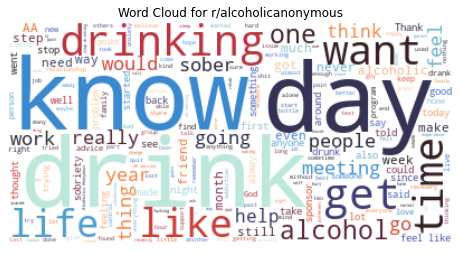

In [46]:
# Wordcloud visualisations for AA

plt.figure(figsize=(8,6))

text_1 = ' '.join(i for i in df.loc[df['subreddit'] == 1]['combined_text'])

wordcloud_1 = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      colormap='icefire',
                      max_words=200
                     ).generate(text_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for r/alcoholicanonymous', size=12)
plt.axis("off")
plt.show()

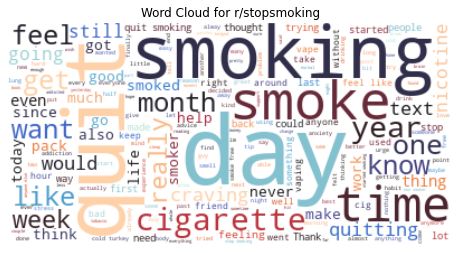

In [47]:
# Wordcloud visualisations for SS

plt.figure(figsize=(8,6))

text_1 = ' '.join(i for i in df.loc[df['subreddit'] == 0]['combined_text'])

wordcloud_1 = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      colormap='icefire',
                      max_words=200
                     ).generate(text_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for r/stopsmoking', size=12)
plt.axis("off")
plt.show()

**Observations from word clouds:** 
* There are several words with relatively large count in both word clouds. These words tends to pertain to the respective subreddit content (e.g. smoking or drink).
* However, we do see some common words that appear (e.g. day, like, time) - could possibly add these as customized stopwords when processing data.
* r/alcoholicanonymous has some words like 'drink', 'sober' and 'alcohol' that are not present in r/stopsmoking.
* Similarly, r/stopsmoking have words such as 'quit', 'cigarette', 'smoke' that r/alcoholicanonymous does not have.
* These unique words for each subreddit could provide good predictive ability to the predictive model.




### Vectorization Visualisation
* CVEC (Count Vectorization)
* TF-IDF (Term Frequency-Inverse Document Frequency)

In [48]:
# Creating seperate series for each subreddit
visual_aa = df.loc[df['subreddit'] == 1, 'clean_text_str']
visual_ss = df.loc[df['subreddit'] == 0, 'clean_text_str']

In [49]:
# Create function for CVEC vector visualisation
def cvec_ngram(range_value):
    
    # Instantiate Vectorizer
    cvec_visual = CountVectorizer(ngram_range=(range_value, range_value), stop_words=stopwords)
    
    # Creat df based on vectorizer
    aa_visual = cvec_visual.fit_transform(visual_aa)
    aa_visual_df = pd.DataFrame(aa_visual.todense(), columns=cvec_visual.get_feature_names())
    ss_visual = cvec_visual.fit_transform(visual_ss)
    ss_visual_df = pd.DataFrame(ss_visual.todense(), columns=cvec_visual.get_feature_names())
    
    # Plot bar graph
    plt.figure(figsize=(9,4))
    
    plt.subplot(1, 2, 1)
    aa_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in r/alcoholicanonymous (CVEC)')
    plt.xlabel('Count(CVEC)')
    plt.ylabel('Words')
    
    plt.subplot(1, 2, 2)
    ss_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in r/stopsmoking (CVEC)')
    plt.xlabel('Count(CVEC)')
    plt.ylabel('Words')
    
    plt.tight_layout()

In [50]:
# Create function for TD-IDF vectorizer visualisation
def tvec_ngram(range_value):
    
    # Instantiate Vectorizer
    tvec_visual = TfidfVectorizer(ngram_range=(range_value, range_value))
    
    # Creat df based on vectorizer
    aa_visual = tvec_visual.fit_transform(visual_aa)
    aa_visual_df = pd.DataFrame(aa_visual.todense(), columns=tvec_visual.get_feature_names())
    ss_visual = tvec_visual.fit_transform(visual_ss)
    ss_visual_df = pd.DataFrame(ss_visual.todense(), columns=tvec_visual.get_feature_names())
    
    # Plot bar graph
    plt.figure(figsize=(9,4))
    
    plt.subplot(1, 2, 1)
    aa_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in r/alcoholicanonymous (TVEC)')
    plt.xlabel('Frequency (TVEC)')
    plt.ylabel('Words')
    
    plt.subplot(1, 2, 2)
    ss_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in r/stopsmoking (TVEC)')
    plt.xlabel('Frequency (TVEC)')
    plt.ylabel('Words')
    
    plt.tight_layout()

### Unigram

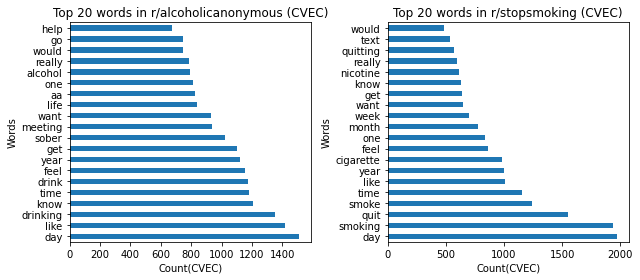

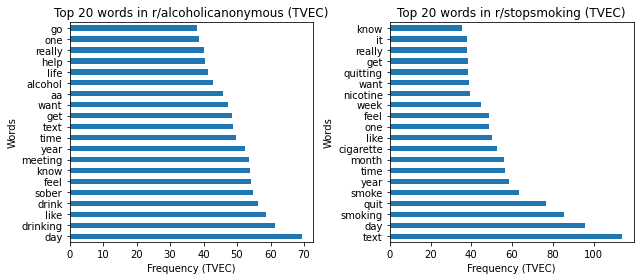

In [51]:
cvec_ngram(1)
tvec_ngram(1)

**Observations:**
* Common words across all unigrams include 'day', 'im', 'feel'. This may be due to all these words being stopwords, since these words do not have any significance in relation to the subreddits, they will be included in the list of customized stopwords.
* Though there are commonalities in both unigrams, there are also words that are unique to each subreddit. As expected, for r/alcoholicanonymous, words pertaining to drinking or AA meetings tend to surface (e.g. 'aa', 'drinking', 'sober') while for r/stopsmoking the words tend to pertain to smoking (e.g. 'smoking', 'cigarette', 'nicotine').
* An interesting observation from r/stopsmoking is the high frequency of 'quit', this may be attributed to the nature of the subreddit which is a community where people join to stop smoking. In contrast, r/alcoholicanonymous seems to encompass words that suggest people are in the process of quitting such as 'meeting' and 'sober'.


### Bigram


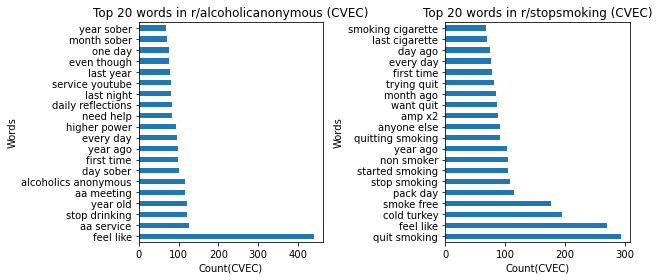

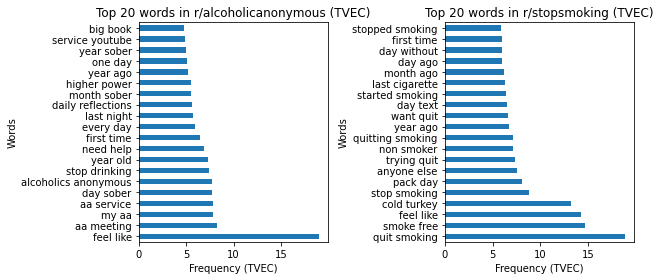

In [52]:
cvec_ngram(2)
tvec_ngram(2)

**Observations:**
* The bigrams show more distinct difference between the top words of each subreddit.
* In r/alcoholicanonymous, we see word pairs like 'aa meeting', 'stop drinking' while r/stopsmoking yielded 'quit smoking', 'cold turkey', 'smoke free' and 'pack day'.
* Surprisingly, the top hit for r/alcoholicanonymous is feel like, which unforuntately does not provide much meaningful information and will be added to the customized stopwords list.

### Trigram

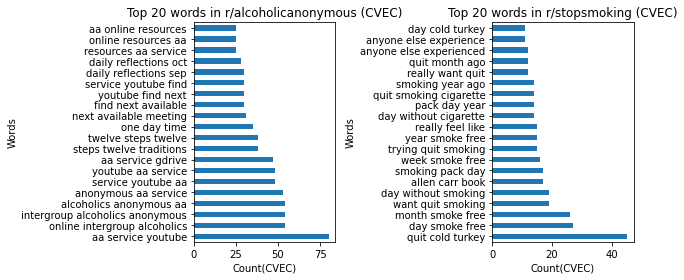

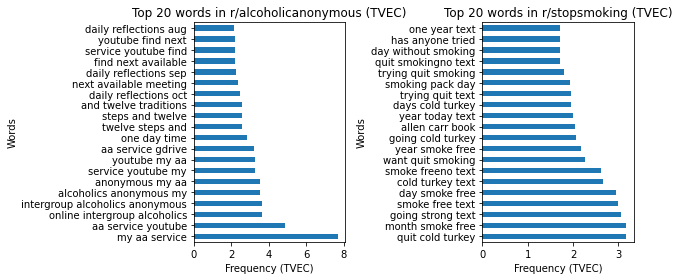

In [53]:
cvec_ngram(3)
tvec_ngram(3)

**Observations:**
* From the trigram, we are able to see more clearly what the most popular topics on the respective subreddits are.
* For r/alcoholicanonymous, we see the top 5 hits pertaining to alcoholic anonymous(AA) groups and services. We also see a few of the top hits containing the word youtube, suggesting that they may be sharing youtube links on AA, perhaps due to the pandemic and the social restrictions that come with it, people are looking for online alternative to in-person AA meetups.
* For r/stopsmoking, we see discussion on 'quit cold turkey' that refers to an abrupt and complete cessation of smoking, it is a popular method despite its drawbacks, hence a discussion regarding people's experience may be a popular topic in the subreddit. Additionally, we see 'month smoke free' as a top phrase, this could have cropped up as the first month of quitting is normally the most difficult ([source](https://www.webmd.com/smoking-cessation/first-month-not-smoking)), hence having a community to share and celebrate that milestone would lead to a higher number of posts.

### Final thoughts on N-grams

From the various n-grams, we see that unigram, as the least computationally intensive, provides us with the least meaningful data as there seems to be the most overlap of words between the 2 subreddits. With bi-gram and tri-gram, we are able to see distinctive phrase from the respective subreddits which would be useful in crafting a predictive model.

The difference in word vectors from CVEC and TVEC does not seem to be significant as the top hits tend to be similar to each other. Both vectorizers will be utilized when building the models to see if scores can be optimized based on the vectorizer used.

### Create new stopwords

In [54]:
# Add new stopwords based on our EDA
new_stopwords = ['notext', 'day', 'im', 'feel', 'time', 'like' 'get']
stopwords += new_stopwords 
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [55]:
df['clean_text']

0       [Does, anyone, look, back, message, post, sent...
1                       [19, year, old, I, problem, text]
2       [How, relationship, alcohol, impacted, romanti...
3       [Rehab, working, home, So, anyone, know, go, r...
4            [What, 3, thing, give, dopamine, Porn, text]
5       [What, would, wanted, sibling, say, noticed, p...
6                    [Advice, alcohol, consumption, text]
7       [What, sort, liability, insurance, event, I, t...
8                                [How, deal, guilt, text]
9       [Does, actually, get, better, Im, 29m, coming,...
10      [Day, two, sobrietyI, sober, 3, year, past, Ju...
11      [First, dayHey, everyone, I, alcoholic, I, ful...
12      [The, Real, Causes, DepressionI, right, video,...
13      [Rock, bottomSo, week, ago, I, fucked, car, ba...
14      [Daily, Reflections, Oct, 27GLOBAL, SHARING, T...
15      [Newbie, questionsGood, morning, I, new, I, qu...
16      [Desperately, Need, Help, Alcoholic, Dementia,...
17            

In [56]:
# Remove new stop words from clean_text
def remove_stopwords(text):     
    
    # Store in text only if word is not word in stopword
    text_nostop = [word for word in text if word not in stopwords]
    
    return text_nostop

df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))
df['clean_text'] = df['clean_text'].map(str)

In [57]:
type(stopwords)

list

In [58]:
visual_aa = df.loc[df['subreddit'] == 1, 'clean_text']
visual_ss = df.loc[df['subreddit'] == 0, 'clean_text']

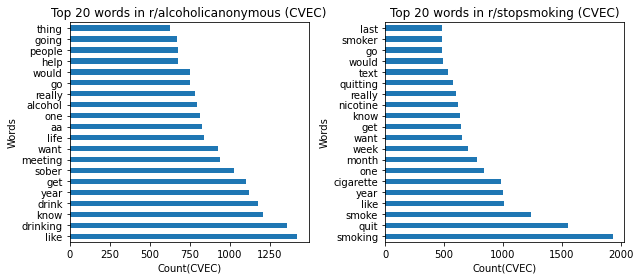

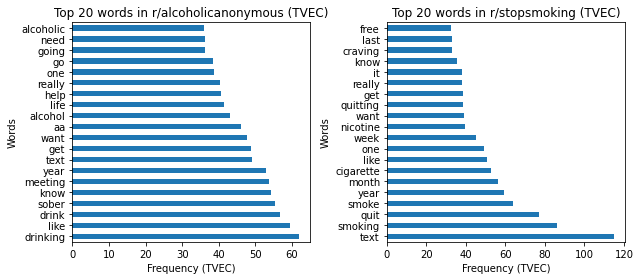

In [59]:
cvec_ngram(1)
tvec_ngram(1)

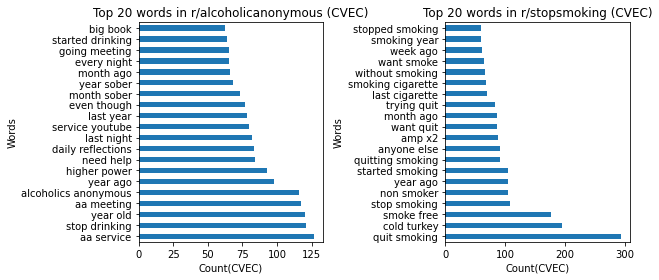

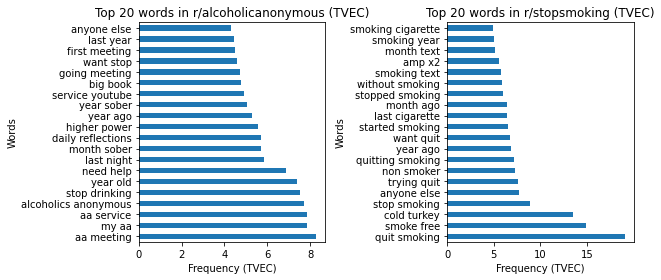

In [60]:
cvec_ngram(2)
tvec_ngram(2)

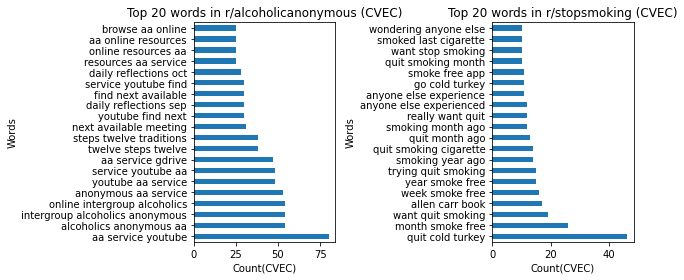

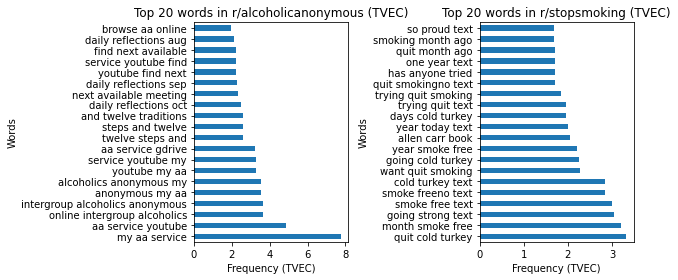

In [61]:
cvec_ngram(3)
tvec_ngram(3)

**Observations after removing additional stopwords:**

The n-grams graph still show similar words and phrases, there doesn't seem to be much effect of adding these few stopwords. Perhaps more analysis can be done in the future to determine more meaningful stopwords.

### Initiate X and y

X and y will be initiated to be used in the modelling section.

In [62]:
# X and y are both series
X = df['clean_text']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

## Modelling

#### Vectorization
* Count Vectorizer (CVEC)
* Term Frequency–Inverse Document Frequency Vectorizer (TFIDF)

#### Modelling
* Logistic Regression
* Naive Bayes - Multinomal

#### Metrics
* Train and test scores
* Accuracy
* Sensitivity
* Specificity
* Precision

### Basic Model

In [63]:
df['subreddit'].value_counts(normalize=True)

1    0.500125
0    0.499875
Name: subreddit, dtype: float64

Since the probability of both subreddit is 50% when rounded, we will take 50% as the baseline model.

In [64]:
# Create empty results dataframe
df_results = pd.DataFrame(
    columns = [
        'Model No.',
        'Word Vectorizer',
        'Classifier',
        'CV Score (train)',
        'Accuracy (train)',
        'Accuracy (test)',
        'Sensitivity (test)',
        'Specificity (test)',
        'Precision (test)',
    ]
)

In [65]:
# Create function to run pipe and print results
def run_grid(X_train, X_test, y_train, y_test):

    
    # Instantiate GridSearchCV
    gs = GridSearchCV(
        pipe, 
        param_grid = params, 
        n_jobs = -1, 
        cv = 5,
        verbose = 1
    )

    # Fit model
    gs.fit(X_train, y_train)

    # Confusion matrix
    y_pred = gs.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    plot_confusion_matrix(gs, 
                  X_test, y_test, 
                  cmap='RdPu', 
                  values_format='d',
                  display_labels=['r/stopsmoking', 'r/alcoholicanonymous']
                 );

    
    # Find current length of df_results
    length = len(df_results)
    
    # Store results in new_row
    new_row = [{
        'Model No.' : length + 1,
        'Word Vectorizer' : pipe.steps[0][1],
        'Classifier' : pipe.steps[1][1],
        'CV Score (train)' : round(gs.best_score_, 3),
        'Accuracy (train)': round(gs.score(X_train, y_train), 3),
        'Accuracy (test)' : round(gs.score(X_test, y_test) ,3 ),
        'Sensitivity (test)' : round (tp/(tp+fn), 3),
        'Specificity (test)' : round (tn/(tn+fp), 3),
        'Precision (test)' : round (tp/(tp+fp), 3),
    }]
    
    # Print best parameters from GridSearchCV
    print('Best Parameters:', gs.best_params_)
    
    return new_row

### Logistic Regression
Logistic regression is used to predict a dependent categorical variable, which is whether an AE is serious or not in our case. It uses a link function (known as the logit link) to effectively "bend" the line so that the curve of the best fit matches the values.

This model is easy to implement, interpret and efficient to train. However a major limitation is the assumption of linearity between dependent and independent variables.

The model will be tuned with GridSearchCV to optimise the hyperparameter 'C' which is the inverse of regularisation strength. Regularisation introduces a penalty to avoid overfitting of the model. The smaller the value of 'C', the stronger the regularisation. The hyperparameter 'penalty' specifying the norm of the penalty will be tuned with GridSearchCV as well.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'cvec__max_features': 15000, 'cvec__ngram_range': (1, 3), 'logit__C': 1, 'logit__penalty': 'l2'}
CPU times: user 5.73 s, sys: 2.45 s, total: 8.18 s
Wall time: 1min 11s


Text(0.5, 1.0, 'CVEC Logistic Regression')

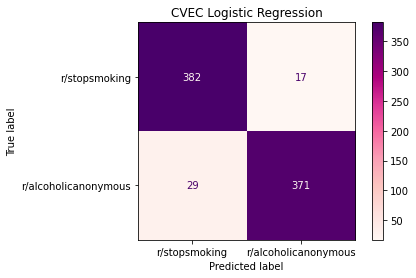

In [66]:
%%time

# Instantiate CountVectorizer() and LogisticRegressionCV()
cvec = CountVectorizer()
logit = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('logit', logit)])

params = {
    'cvec__max_features': [5000, 10000, 15000, 20000],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],     
    'logit__C': [0.1, 1, 10], 
    'logit__penalty': ['l1', 'l2', 'none']}


new_results = run_grid(X_train, X_test, y_train, y_test)
df_results = pd.concat([df_results, pd.DataFrame(new_results)], axis = 0)
plt.title('CVEC Logistic Regression');

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'logit__C': 10, 'logit__penalty': 'l2', 'tvec__max_features': 10000, 'tvec__ngram_range': (1, 2)}
CPU times: user 4.77 s, sys: 1.59 s, total: 6.36 s
Wall time: 1min 17s


Text(0.5, 1.0, 'TVEC Logistic Regression')

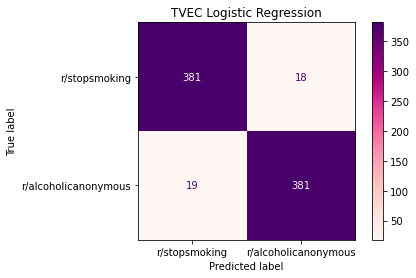

In [67]:
%%time

# Instantiate TfidfVectorizer() and LogisticRegressionCV()
tvec = TfidfVectorizer()
logit = LogisticRegression()

pipe = Pipeline([
    ('tvec', tvec),
    ('logit', logit)])

params = {
    'tvec__max_features': [5000, 10000, 15000, 20000],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)],    
    'logit__C': [0.1, 1, 10], 
    'logit__penalty': ['l1', 'l2', 'none']}


new_results = run_grid(X_train, X_test, y_train, y_test)
df_results = pd.concat([df_results, pd.DataFrame(new_results)], axis = 0)
plt.title('TVEC Logistic Regression');

In [68]:
df_results

Model No.    Word Vectorizer            Classifier  CV Score (train)  \
0         1  CountVectorizer()  LogisticRegression()             0.948   
0         2  TfidfVectorizer()  LogisticRegression()             0.955   

   Accuracy (train)  Accuracy (test)  Sensitivity (test)  Specificity (test)  \
0             0.991            0.942               0.928               0.957   
0             0.996            0.954               0.952               0.955   

   Precision (test)  
0             0.956  
0             0.955

**Observations:**
* The model that used TVEC have a slightly better train and test accuracy score than the CVEC vectorizer, indicating that it is able to correctly predict which subreddit the post belongs to.
* As we look at the difference between the train and test score for both CVEC and TVEC, we find that CVEC has a larger difference suggesting that the model usingCVEC is more overfitted as compared to the model using TVEC.
* Based on the findings, TVEC vectorizer produced better sensitivity value than CVEC, possibly due to the weighted nature of TVEC.
* Specificity and precision for CVEC was marginally better by 0.1-0.2%, indicating that both models have roughly the same capabilities in specificity and precision.

**Best parameters:**<br>
CVEC/LR: {'cvec__max_features': 15000, 'cvec__ngram_range': (1, 3), 'logit__C': 1, 'logit__penalty': 'l2'} <br>
TVEC/LR: {'tvec__max_features': 10000, 'tvec__ngram_range': (1, 2), 'logit__C': 10, 'logit__penalty': 'l2'} <br>

**Observations:**
* Looking at max features used, TVEC used less features as TVEC uses the weighted method to place more emphasize on terms in the subreddit.
* CVEC used unigram, bigram and trigram, while TVEC used only unigram and bigram.
* Both models used l2 penalty, but the strength of regularization was higher for CVEC as compared to TVEC. This could be attributed to the weighted nature of TVEC which reflects how important a word is to the subreddit.

**Better vectorizer for LR: TVEC**

### Multinomial Naive Bayes

Naive Bayes is based on Bayes theorem and predicts the likelihood that an event will occur given evidence that is present in the dataset. Multinomial Naive Bayes has been chosen as it is the most suitable when our variables are positive integers.

This model can work effectively well with large datasets and has relatively low computational costs. However, it assumes that all features are independent which is difficult to acquire in real life.

The model will be tuned with GridSearchCV to optimise the hyperparameter 'alpha' which represent the Laplace smoothing parameter and 'fit_prior' representing whether to learn class prior probabilities or not.

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'cvec__max_features': 30000, 'cvec__ngram_range': (1, 2), 'nb__alpha': 1.5, 'nb__fit_prior': True}
CPU times: user 2.22 s, sys: 740 ms, total: 2.96 s
Wall time: 33.4 s


Text(0.5, 1.0, 'CVEC Naive Bayes')

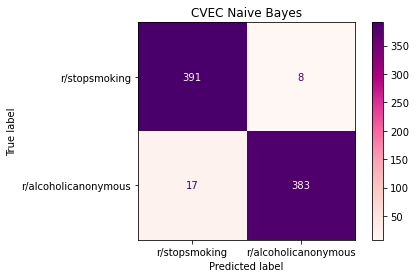

In [69]:
%%time

# Instantiate CountVectorizer() and MultinomialNB()
cvec = CountVectorizer()
nb = MultinomialNB()

pipe = Pipeline([
    ('cvec', cvec),
    ('nb', nb)])

params = {
    'cvec__max_features': [10000, 20000, 30000, 40000],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'nb__alpha': np.linspace(0.5, 1.5, 2),
    'nb__fit_prior': [True, False]
}

new_results = run_grid(X_train, X_test, y_train, y_test)
df_results = pd.concat([df_results, pd.DataFrame(new_results)], axis = 0)
plt.title('CVEC Naive Bayes');

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'nb__alpha': 1.5, 'nb__fit_prior': True, 'tvec__max_features': 20000, 'tvec__ngram_range': (1, 3)}
CPU times: user 2.81 s, sys: 844 ms, total: 3.66 s
Wall time: 33.9 s


Text(0.5, 1.0, 'TF-IDF Naive Bayes')

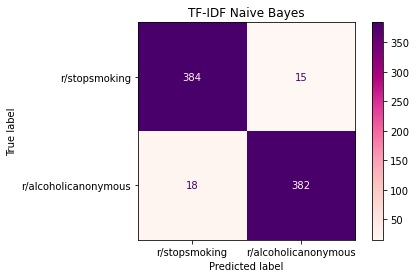

In [70]:
%%time

# Instantiate TfidfVectorizer() and MultinomialNB()
tvec = TfidfVectorizer()
nb = MultinomialNB()

pipe = Pipeline([
    ('tvec', tvec),
    ('nb', nb)
])

params = {
    'tvec__max_features': [10000, 20000, 30000, 40000],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)],     
    'nb__alpha': np.linspace(0.5, 1.5, 2),
    'nb__fit_prior': [True, False]}

new_results = run_grid(X_train, X_test, y_train, y_test)
df_results = pd.concat([df_results, pd.DataFrame(new_results)], axis = 0)
plt.title('TF-IDF Naive Bayes');

In [71]:
df_results

Model No.    Word Vectorizer            Classifier  CV Score (train)  \
0         1  CountVectorizer()  LogisticRegression()             0.948   
0         2  TfidfVectorizer()  LogisticRegression()             0.955   
0         3  CountVectorizer()       MultinomialNB()             0.952   
0         4  TfidfVectorizer()       MultinomialNB()             0.948   

   Accuracy (train)  Accuracy (test)  Sensitivity (test)  Specificity (test)  \
0             0.991            0.942               0.928               0.957   
0             0.996            0.954               0.952               0.955   
0             0.977            0.969               0.958               0.980   
0             0.982            0.959               0.955               0.962   

   Precision (test)  
0             0.956  
0             0.955  
0             0.980  
0             0.962

**Observations:**
* TVEC gives us a better train accuracy but lower test accuracy, indicating that the model is more overfitted than the model using CVEC.
* CVEC also outperforms TVEC in specificity and precision, but TVEC performs better in sensitivity.

**Best parameters:**<br>
CVEC/NB: {'cvec__max_features': 20000, 'cvec__ngram_range': (1, 2), 'nb__alpha': 1.5, 'nb__fit_prior': True} <br>
TVEC/NB: {'tvec__max_features': 20000, 'tvec__ngram_range': (1, 3), 'nb__alpha': 1.5, 'nb__fit_prior': True} <br>

**Obeservations:**
* Generally multinomial naive bayes, uses a large number of features (at least 20,000).
* CVEC uses unigram and bigram, while TVEC uses unigram, bigram and trigram.
* The best alpha for both models is 1.5

**Best vectorizer for NB: CVEC**

**Best parameters for each model:**

CVEC/LR: {'cvec__max_features': 15000, 'cvec__ngram_range': (1, 3), 'logit__C': 1, 'logit__penalty': 'l2'} <br>
TVEC/LR: {'tvec__max_features': 10000, 'tvec__ngram_range': (1, 2), 'logit__C': 10, 'logit__penalty': 'l2'} <br>
CVEC/NB: {'cvec__max_features': 20000, 'cvec__ngram_range': (1, 2), 'nb__alpha': 1.5, 'nb__fit_prior': True} <br>
TVEC/NB: {'tvec__max_features': 20000, 'tvec__ngram_range': (1, 3), 'nb__alpha': 1.5, 'nb__fit_prior': True} <br>

In [72]:
df_results

Model No.    Word Vectorizer            Classifier  CV Score (train)  \
0         1  CountVectorizer()  LogisticRegression()             0.948   
0         2  TfidfVectorizer()  LogisticRegression()             0.955   
0         3  CountVectorizer()       MultinomialNB()             0.952   
0         4  TfidfVectorizer()       MultinomialNB()             0.948   

   Accuracy (train)  Accuracy (test)  Sensitivity (test)  Specificity (test)  \
0             0.991            0.942               0.928               0.957   
0             0.996            0.954               0.952               0.955   
0             0.977            0.969               0.958               0.980   
0             0.982            0.959               0.955               0.962   

   Precision (test)  
0             0.956  
0             0.955  
0             0.980  
0             0.962

**Observations on models:**
* All models have generally good scores (>90%) for both test and train. 
* The sensitivity, specificity and precision do not differ that wildly as well.
* Since CVEC/NB produced the best test accuracy score with the least overfit, it will be used as the final model.

## Final Model

Test score (Accuracy): 0.969
Sensitivity: 0.958, Specificity: 0.980, Precision: 0.980
CPU times: user 724 ms, sys: 13.3 ms, total: 737 ms
Wall time: 739 ms


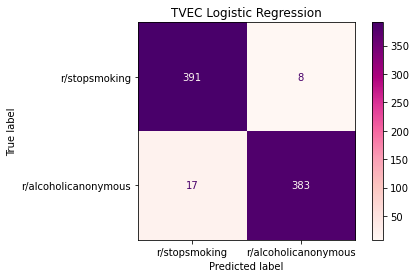

In [73]:
%%time
# Create and fit the final selected model

# Best Parameters: {'cvec__max_features': 30000, 
#                   'cvec__ngram_range': (1, 2), 
#                   'nb__alpha': 1.5, 'nb__fit_prior': True}
    
pipe = Pipeline([
    ('cvec', CountVectorizer(max_features=30000, ngram_range=(1,2))),
    ('nb', MultinomialNB(alpha=1.5, fit_prior=True))])
    #('logit', LogisticRegression(C=10, penalty='l2'))])

pipe.fit(X_train, y_train)

# Confusion matrix
y_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

plot_confusion_matrix(pipe, 
              X_test, y_test, 
              cmap='RdPu', 
              values_format='d',
              display_labels=['r/stopsmoking', 'r/alcoholicanonymous']
             );
plt.title('TVEC Logistic Regression');

# Print results
print(f'Test score (Accuracy): {pipe.score(X_test, y_test):.3f}')
print(f'Sensitivity: {tp/(tp+fn):.3f}, Specificity: {tn/(tn+fp):.3f}, Precision: {tp/(tp+fp):.3f}')




**Observations:**
* The final model chosen was CVEC/NB, and it has a test score (accuracy) of 96.9%, which is higher than our baseline model of 50%.
* The model has a high level of sensitivity, meaning the number of correctly predicted posts for r/alcoholicanonymous compared to the total posts in r/alcoholicanonymous post is 95.8%. 
* It also has a high level of specificity, indicating that the number of correctly predicted posts for r/stopsmoking compared to the total predicted r/stopsmoking post is 98%. 
* The model has a high level of precision, meaning the number of correctly predicted posts for r/alcoholicanonymous compared to the predicted posts in r/alcoholicanonymous post is 98%.

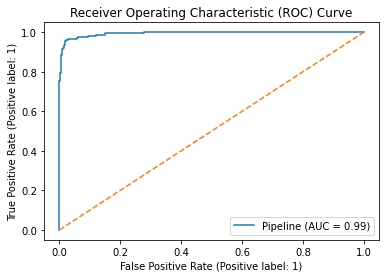

In [74]:
# ROC curve
plot_roc_curve(pipe, X_test, y_test)

# add worst case scenario line
plt.plot([0,1], [0,1], label = "baseline", linestyle = "--")

# add title
plt.title('Receiver Operating Characteristic (ROC) Curve');

**Observations:**
* The AUC-ROC curve is a performance measurement for the classification problem at various treshold settings. 
* An AUC score of 99% means that our model is able to distinguish between the posts of both subreddits very well.

### Features of importance

In [75]:
# Obtain coefficients from logit model
coef = pipe.named_steps['nb'].coef_.flatten()

In [76]:
# Obtain feature names from TF-IDF vectorizer
features = pipe.named_steps['cvec'].get_feature_names()

In [77]:
# Create dataframe of features and their coefficients
df_coef = pd.DataFrame(zip(features, coef), 
                       columns = ["Features", "Coefficient"]
                      ).sort_values('Coefficient', 
                                    ascending = False)

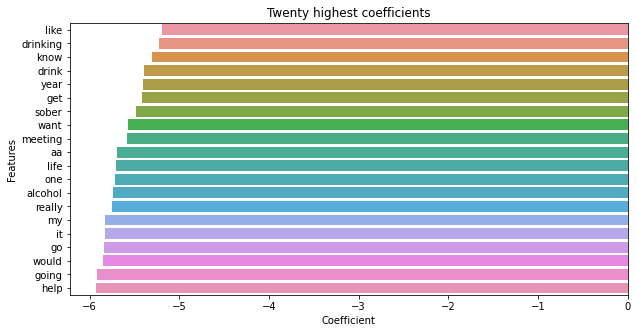

In [78]:
# Plot 20 highest coefficients
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Coefficient', y = 'Features', data = df_coef.head(20))
ax.set_title(f"Twenty highest coefficients")
ax.set_xlabel("Coefficient")
ax.set_ylabel("Features");

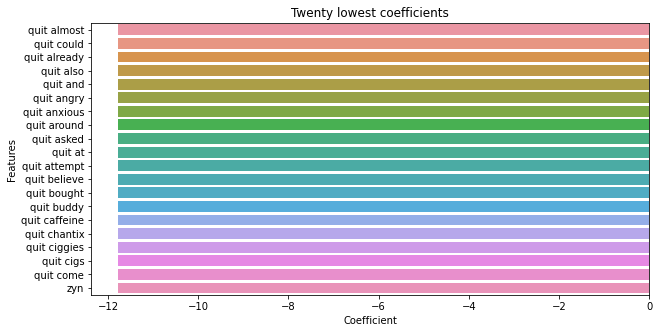

In [79]:
# Plot 20 lowest coefficients
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Coefficient', y = 'Features', data = df_coef.tail(20))
ax.set_title(f"Twenty lowest coefficients")
ax.set_xlabel("Coefficient")
ax.set_ylabel("Features");

In [80]:
df_coef.head(10)

Features  Coefficient
13651      like    -5.198413
6819   drinking    -5.222657
12929      know    -5.306285
6649      drink    -5.393063
29658      year    -5.409993
9473        get    -5.420291
23836     sober    -5.488093
28000      want    -5.572813
15053   meeting    -5.579534
369          aa    -5.696727

In [81]:
df_coef.tail(10)

Features  Coefficient
18786   quit attempt   -11.782744
18788   quit believe   -11.782744
18789    quit bought   -11.782744
18790     quit buddy   -11.782744
18792  quit caffeine   -11.782744
18793   quit chantix   -11.782744
18795   quit ciggies   -11.782744
18796      quit cigs   -11.782744
18798      quit come   -11.782744
29999            zyn   -11.782744

**Observations:**
* Looking at our top 20 coefficients (coef), we see that they are related to alcoholism (e.g. aa, sober) , as they are the words from r/alcoholicanonymous.
* Conversely, the bottom 20 coef pertain to smoking (e.g. quit ciggies, quite chantix).
* Interestingly, the top coef tend to come from the unigram while the bottom coef tends to be words from bigram.

## Conclusion & Recommendations

Overall, both subreddits have users that are active in searching for support and resource in their journey to ceasing the addictive substance (alcohol and cigarettes). With the top model (CVEC with multinomial NB), we are able to get a prediction with 96.9% accuracy. 

We propose that the rehabilitation center to build a chatbot using the algorithm from our model to aid the center identify users seeking help. This can be utilized in 2 main ways:
* Using the user's response to classify them into the respective group
* Presenting users with messages containing features of each group to correctly classify them

This would be incredibly useful during COVID-19 as there are less opportunities to seek out physical help. Having an outlet online, such as a platform or chatbot, would enable the rehabilitation center to make a preliminary assessment on the user, by identifying which resources and medical professional would best suit their needs.

## Future Plans

For our current model, we could optimize it by improving the list of customised stopwords in this iteration. As our data may have overlapping words from both subreddits, we could look into identifying these overlaps and remove them to narrow down the features for our model.

Another point for exploration would be expanding the scope of data collection. As reddit posts may not be as binary to solely contain just alcoholism/smoking words, there are 2 things we could look at:
1. For posts containing both smoking and alcoholism, we could refine our model to be able to classify posts as containing both features, and not just force it into a single category.
2. Some posts may contain other words pertaining mental health conditions (that often presents as comorbidities) such as depression, anxiety or bipolar. Expanding our data collection to include other subreddits would allow the model to learn and classify other conditions, making it more comprehensive.

